# Atlas Code

<p align="center">
    <img src="./atlas.png" style="height: 200px;"/>
</p>

Alejandro has developed an atlas of gene expression across the mouse life span, and this notebook walks through exploratory analysis on this dataset.

## Table of Contents

- [Introduction](#intro)
- [Data Normalization](#norm)
- [Scaling of Counts](#scaling)
- [Example Pathway](#ex)
    - [Pathway gene expression](#path)
    - [Cell type expression of pathway genes](#ctpath)
    - [Co-expression heatmap](#coexp)
- [Conclusion](#concl)

### Introduction <a name="intro"></a>

This atlas samples a large diversity of mouse cell states, from  early gastrulation (E5.5) to late adulthood (30 months). 

The individual datasets in the atlas are shown below:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 932px">
<colgroup>
<col style="width: 204px">
<col style="width: 205px">
<col style="width: 177px">
<col style="width: 63px">
<col style="width: 172px">
<col style="width: 111px">
</colgroup>
<thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">Dataset</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Time Points</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Author</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Cells</span></th>
    <th class="tg-0lax"><span style="font-weight:bold">Mice Sampled</span></th>
    <th class="tg-0lax"><span style="font-weight:bold">Library Type</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:normal;text-decoration:none">Forelimb</span><span style="font-weight:400;font-style:normal;text-decoration:none"> atlas (</span><span style="font-style:normal">The changing mouse embryo transcriptome at whole tissue and single-cell resolution)</span></td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">E10.5, E11.0, E11.5, E12.0, E13.0, E13.5, E14.0, E15.0</span></td>
    <td class="tg-0pky">He et al. (2020)</td>
    <td class="tg-0pky">90,637</td>
    <td class="tg-0lax">Pair of forelimbs per time point</td>
    <td class="tg-0lax">10X</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-style:normal">A single-cell molecular map of </span><span style="font-weight:bold;font-style:normal">mouse gastrulation and early organogenesis</span></td>
    <td class="tg-0lax">E6.5, E6.75, E7.0, E7.25, E7.5, E7.75, E8.0, E8.25, E8.5</td>
    <td class="tg-0lax">Pijuan-Sala et al. (2019)</td>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">116,312</span></td>
    <td class="tg-0lax">411 mouse embryos total</td>
    <td class="tg-0lax">10X</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-style:normal">The emergent landscape of the mouse gut </span><span style="font-weight:bold;font-style:normal">endoderm</span><span style="font-style:normal"> at single-cell resolution</span></td>
    <td class="tg-0lax">E5.5</td>
    <td class="tg-0lax">Nowotschin et al. (2019)</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">-</td>
    <td class="tg-0lax">10X</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-style:normal">Single-cell RNA-seq analysis unveils a prevalent epithelial/mesenchymal hybrid state during mouse </span><span style="font-weight:bold;font-style:normal">organogenesis</span></td>
    <td class="tg-0lax">E9.5-E11.5</td>
    <td class="tg-0lax">Dong et al. (2018)</td>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">1916</span></td>
    <td class="tg-0lax">7 total embryos</td>
    <td class="tg-0lax">Smart-Seq2</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-weight:bold">Tabula Muris Senis</span></td>
    <td class="tg-0lax">1mo, 3mo, 18mo, 21mo, 24mo, 30mo</td>
    <td class="tg-0lax">Tabula Muris Consortium (2020)</td>
    <td class="tg-0lax">350,000</td>
    <td class="tg-0lax">-</td>
    <td class="tg-0lax">10X, FACS</td>
  </tr>
</tbody>
</table>

These data were merged by first pre-processing each dataset individually using a standard scRNA-seq pipeline (quality control, filtering, normalization) and then applying unsupervising learning algorithms to cluster cells. Given the excessive number of zeroes, or "drop-outs," in scRNA-seq data, instead of using counts from single-cells in our final atlas, we generated a "pseudo-bulk" sample per cluster that corresponds to average gene expression of its members. This generated **1206 unique pseudo-bulk samples from 6 different datasets**. 

Since we filter out lowly-expressed genes in the scRNA-seq pre-processing step, this atlas does not contain the entire transcriptome. Moreover, since we filter genes separately for each dataset, the atlas only contains the interesction of genes that remain across the pseudo-bulk samples, to **capture a total of 11,675 genes** out of the ~22k in the mouse transcriptome. 

Our merged data consists of 1206 pseudo-bulk samples, from a diverse range of cell types and stages. We can use this dataset to explore gene expression in various pathways, and how they vary across tissues and time points. This tutorial walks through some additional processing steps and possible analyses for this data.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import itertools

# For normalization of gene counts
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data directory
datadir = "./data/"

Our data files consist of a csv with pseudo-bulk counts from our datasets, a csv with metadata annotations for each pseudo-bulk sample, and a reference list of pathways of interest and their components. 

In [3]:
# Import necessary files
# Load the atlas dataset of counts
counts = pd.read_csv(datadir + "counts.csv", index_col = [0]).T

# Import metadata csv
meta = pd.read_csv(datadir + "meta.csv", index_col = [0])

# Import reference pathway list csv
pathways = pd.read_csv(datadir + "pathway_list.csv")

### Data Normalization <a name="norm"></a>

The imported count dataset contains normalized counts after processing from each dataset. However, to eliminate differences in factors like sequencing depth (from different sequencing protocols) and cell size (between different cells), we can normalize the pseudo-bulk sample counts so that they have the same total counts per sample, 1e4. 

Additionally, in scRNA-seq analysis, many downstream computations on count data typically assume normality of their distributions. However, raw count data from scRNA-seq is highly skewed, and we conduct a log-plus-one normalization to bring the data "closer" to normality. 

In [4]:
# Normalize the data such that the total counts per cluster is 1e4, then take the log
integrated_counts = np.log1p(counts.div(counts.sum(axis=1),axis=0)*1e4)

# A quick check: the total counts for each pseudo-bulk sample indeed add to 1e4
np.expm1(integrated_counts).sum(axis = 1)

1_E6.5_8.5_Chan    10000.0
2_E6.5_8.5_Chan    10000.0
3_E6.5_8.5_Chan    10000.0
4_E6.5_8.5_Chan    10000.0
5_E6.5_8.5_Chan    10000.0
                    ...   
1202_FACS 3m       10000.0
1203_FACS 3m       10000.0
1204_FACS 3m       10000.0
1205_FACS 3m       10000.0
1206_FACS 3m       10000.0
Length: 1206, dtype: float64

### Scaling of Counts <a name="scaling"></a>

To compare expression of different genes in a pathway, we need to account for the the fact that counts for different genes may have very different dynamic ranges, and any direct clustering on these normalized data would be biased toward highly-expressed genes. To give equal weight to all features, we can perform MinMax scaling to scale counts per gene to lie in the range of 0 to 1. However, since RNA count distributions are right-tailed, scaling the maximum count value per gene to correspond to a value of 1 would sharply skew the new, scaled. values. We can instead more robustly saturate count values by scaling the count value that corresponds to a scaled expression value of 1.0 to be some percentile of maximum gene expression (i.e. the 99th percentile). 

The function below saturates the expression values in a DataFrame at inputted gene-specific percentiles.

In [5]:
# Returns a clipped matrix given a list of max values (values to clip at) for each gene
def quantile_saturation(x = [], gene_quantiles = []):
    
    col_order = list(x.columns)
    
    x_clipped = pd.DataFrame()
    # Saturate the values based on 99% quantile (more robust than using the abs max)
    for i in x.index:
        x_clipped =  x_clipped.append(np.clip(x.loc[i], a_min=0, a_max = gene_quantiles))
        
    # Pandas automatically makes the new df columns alphabetically ordered
    # re-order columns how they were originally entered by the user
    
    x_clipped = x_clipped[col_order]
    
    return x_clipped

In [6]:
# Compute the 99th quantile per gene
gene_quantiles = np.quantile(integrated_counts, q = 0.99, axis = 0)

# Clip the values such that any counts above the 99th quantile take its value
x_clipped = quantile_saturation(integrated_counts, gene_quantiles)
x_clipped.describe() 

,Abi2,Acadl,Actr1b,Adam23,Adhfe1,Aff3,Als2,Ankrd39,Ankrd44,Arfgef1,...,Vldlr,Vps13a,Vti1a,Vwa2,Xpnpep1,Zdhhc16,Zdhhc6,Zfand5,Zfp518a,Zfyve27
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,0.131104,0.419033,0.299646,0.034659,0.041421,0.059043,0.022537,0.088134,0.147925,0.243440,...,0.064797,0.108834,0.075243,0.009736,0.329053,0.201650,0.273688,0.792094,0.079371,0.099893
std,0.120448,0.316629,0.191796,0.125192,0.149613,0.083150,0.021302,0.055952,0.163787,0.192053,...,0.130461,0.092880,0.044354,0.024580,0.204267,0.135871,0.166604,0.424579,0.058900,0.074068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027770,0.000000,0.000000
25%,0.032132,0.196822,0.136698,0.000000,0.000000,0.004852,0.009038,0.046637,0.013629,0.111159,...,0.000835,0.038561,0.044204,0.000000,0.164449,0.082440,0.127221,0.529310,0.038978,0.052322
50%,0.094997,0.334985,0.256611,0.003012,0.002350,0.024880,0.017346,0.084176,0.079003,0.202464,...,0.015677,0.083446,0.066156,0.000000,0.287315,0.187149,0.266036,0.677916,0.068851,0.079929
75%,0.205766,0.532262,0.454596,0.015538,0.011664,0.076560,0.028825,0.116672,0.249609,0.301298,...,0.053449,0.149860,0.097640,0.006300,0.479835,0.316328,0.405449,0.941316,0.106118,0.121980
max,0.522994,1.575520,0.746896,0.967272,1.035661,0.412882,0.123911,0.279431,0.692043,0.961763,...,0.694113,0.460004,0.214049,0.139733,0.901013,0.510094,0.652144,2.139223,0.338800,0.429825


We can now scale expression values in this DataFrame of "clipped" counts to lie between 0 and 1, using a simple MinMaxScaler from scikitlearn that linearly scales counts to lie between the a specified minimum and maximum value per gene.

In [7]:
# Initialize the scaler
scaler = MinMaxScaler()
# Fit the scaler to the dataset to compute per-feature min. and max. values
scaler.fit(x_clipped)

# Apply the scaler to the dataset
df_scale = pd.DataFrame(scaler.transform(x_clipped), columns = x_clipped.columns, index = x_clipped.index)

# Add annotations to our dataframe
df_scale['cell_id'] = meta['cell_id']
df_scale['Cell_class'] = meta['Cell_class']

df_scale.head()

,Abi2,Acadl,Actr1b,Adam23,Adhfe1,Aff3,Als2,Ankrd39,Ankrd44,Arfgef1,...,Vti1a,Vwa2,Xpnpep1,Zdhhc16,Zdhhc6,Zfand5,Zfp518a,Zfyve27,cell_id,Cell_class
1_E6.5_8.5_Chan,0.580457,0.140350,0.676575,0.028686,0.004046,0.151459,0.426125,0.431623,0.012108,0.154960,...,0.243324,0.129005,0.492912,0.619371,0.767157,0.246361,0.651432,0.146973,1_E6.5_8.5_Chan,Epiblast
2_E6.5_8.5_Chan,0.241409,0.092006,0.508189,0.017349,0.011275,0.080465,0.048021,0.494967,0.000000,0.071724,...,0.152335,0.030652,0.425883,0.424370,0.530597,0.252955,0.253046,0.056076,2_E6.5_8.5_Chan,Ectoderm
3_E6.5_8.5_Chan,0.458171,0.113981,0.654406,0.068303,0.005145,0.162122,0.372052,0.547446,0.020579,0.194061,...,0.218735,0.264121,0.333217,0.533762,0.755081,0.254879,0.843063,0.154786,3_E6.5_8.5_Chan,Epiblast
4_E6.5_8.5_Chan,0.546443,0.144844,0.677988,0.058156,0.004190,0.167652,0.400421,0.677206,0.017567,0.184765,...,0.162087,0.157618,0.464262,0.600279,0.768458,0.286603,0.565512,0.125318,4_E6.5_8.5_Chan,Epiblast
5_E6.5_8.5_Chan,0.118424,0.124991,0.787027,0.002007,0.001205,0.021202,0.310272,0.562648,0.001915,0.242430,...,0.413131,0.009482,0.756758,0.608769,0.765071,0.234795,0.345693,0.140809,5_E6.5_8.5_Chan,Ex_ectoderm


### Example Pathway<a name="ex"></a>

We now have MinMax scaled gene expression, and can probe expression of genes in specific pathways of interest and evaluate how these vary across different timepoints, cell types, etc. 

I'll demonstrate some possible queries we can make from this atlas dataset using the Notch signaling pathway. 

Note, we can substitute this pathway with any other pathways or subsets of genes. The DataFrame "pathways" contains a curated list of genes in select pathways (shown below). 

In [8]:
# The pathways that are in our curated list
# l means ligands, r means receptors
pathways["pathway"].unique()

array(['Bmp_l', 'Notch', 'Bmp_Tgfb', 'Bmp', 'Wnt', 'Eph_r', 'Eph_l',
       'Fgfr', 'Srsf', 'Lpa', 'Wnt_l', 'Bmp_down', 'Bmp_fun'],
      dtype=object)

I will use the list of Notch components stored in our curated list above. Otherwise, if you want to study a set of signaling genes not in this csv, simply change the pathway name and list of genes below.

In [9]:
# Select the Notch genes from our reference list
pathway = "Notch"
genes = list(pathways[pathways["pathway"] == pathway]["gene"].values)

As of now, the integrated atlas only consists of the intersection of genes that are expressed at a basal level in all datasets (for a total of 11,675 genes out of ~22k total). Some genes specified in our list above may not be contained within this intersection, so we filter them out below, and subset the remaining pathway genes.

In [10]:
# Subset a DataFrame with only the genes selected above
pathway_genes = [i for i in genes if i in df_scale.columns]

df_pathway = df_scale[pathway_genes]

df_pathway.head()

,Dll1,Dll3,Dll4,Jag1,Jag2,Notch1,Notch2,Notch3,Notch4,Mfng,Rfng,Lfng
1_E6.5_8.5_Chan,0.014819,0.136275,0.000000,0.041043,0.016864,0.046589,0.062934,0.064582,0.114331,0.026468,0.236436,0.015711
2_E6.5_8.5_Chan,0.000000,0.068862,0.000000,0.005510,0.000000,0.001764,0.009885,0.008756,0.071154,0.034318,0.182304,0.000000
3_E6.5_8.5_Chan,0.010974,0.073606,0.000000,0.040344,0.000000,0.036166,0.429603,0.062882,0.062029,0.063305,0.188277,0.025875
4_E6.5_8.5_Chan,0.006131,0.088485,0.002994,0.008539,0.007506,0.032810,0.032471,0.059412,0.101778,0.073151,0.238092,0.027696
5_E6.5_8.5_Chan,0.001608,0.057720,0.000000,0.001342,0.033267,0.015496,0.037971,0.001749,0.160801,0.007979,0.429918,0.001190


#### Pathway gene expression<a name="path"></a>

To visualize the degree of gene activation, we can look at the expression of pathway genes above a threshold value across the pseudobulk samples/clusters. 

In [11]:
# Select a threshold for expression being "ON"
thresh = 0.1

In [12]:
# Count number of clusters that have expression above the threshold for "ON"
df_thresh = pd.DataFrame((df_pathway >= thresh).apply(np.count_nonzero), columns = ["counts"])

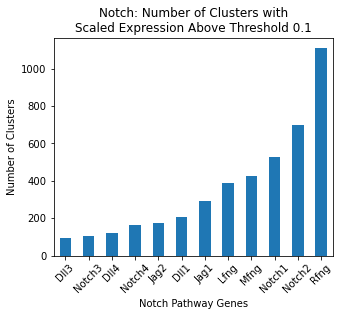

In [13]:
fig, ax = plt.subplots(figsize = (5,4))
df_thresh.sort_values(by = ["counts"]).plot.bar(ax = ax)
ax.set_title(pathway + ": Number of Clusters with\nScaled Expression Above Threshold "+ str(thresh))
ax.set_xlabel(pathway + " Pathway Genes")
ax.tick_params(axis='x', rotation=45)

ax.set_ylabel("Number of Clusters")
ax.get_legend().remove()

#### Cell Type Expression of Pathway Genes<a name="ctpath"></a>

Similarly, we can visualize the distribution of pathway expression (above a threshold) across different tissues. 

In [14]:
# Obtain counts >= 0.1
df_ct_thresh = df_pathway[df_pathway >= 0.1]

# Add Cell type annotations from metadata file
df_ct_thresh["Cell_class"] = meta["Cell_class"]

# Group by cell type to count the number of clusters with expression of pathway components
df_ct_thresh = df_ct_thresh.groupby("Cell_class").count().div(meta.groupby("Cell_class")["Cell_class"].count(), axis='rows')

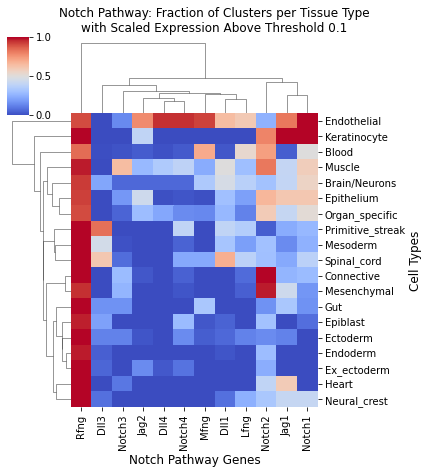

In [15]:
g = sns.clustermap(df_ct_thresh, cmap = "coolwarm", figsize = (6,6),
                   # Choosing to keep euclidean clustering of genes and tissue types
                   row_cluster = True, col_cluster = True);

# Set title
g.fig.suptitle(pathway + " Pathway: Fraction of Clusters per Tissue Type\nwith Scaled Expression Above Threshold "+ str(thresh),
              y = 1.05)

# Set axes labels
g.ax_heatmap.set_xlabel(pathway + " Pathway Genes", fontsize = 12)
g.ax_heatmap.set_ylabel("Cell Types", fontsize = 12);

#### Co-Expression Heatmap<a name="coexp"></a>

We can quantify co-expression by counting the number of clusters that express pairs of Notch components above the specified threshold, which is visualized below as a heatmap.

In [16]:
# Construct a square matrix to quantify co-expression
arrays = [
    np.repeat(pathway_genes, len(pathway_genes)),
    np.array(pathway_genes*len(pathway_genes))
]

coexp_df = pd.DataFrame(columns = arrays)

for i in pathway_genes:
    for j in pathway_genes:
        coexp_df[(i, j)] = np.where((df_pathway[i] >= 0.1) & (df_pathway[j] >= 0.1), 1, 0)
    
coexp_df = coexp_df.sum(axis = 0).unstack(level = 0)

The block of code below is specific to Notch—for a neater display, I simply want to make sure that the different component types are grouped together in our plot, and so I specify the order below.

In [17]:
# Specify the order of genes we want to display in our heatmap 
# (seprating ligands from receptors, etc.)
genes_order = ['Dll1', 'Dll3', 'Dll4', # Delta ligands
               'Jag1', 'Jag2', # Jag ligands
               'Notch1', 'Notch2', 'Notch3', 'Notch4', # Notch receptors
               'Lfng', 'Mfng', 'Rfng'] # Fringes

coexp_df = coexp_df.loc[genes_order][genes_order]/df_pathway.shape[0]

coexp_df

,Dll1,Dll3,Dll4,Jag1,Jag2,Notch1,Notch2,Notch3,Notch4,Lfng,Mfng,Rfng
Dll1,0.171642,0.038972,0.062189,0.098673,0.078773,0.125207,0.077114,0.019900,0.064677,0.094527,0.069652,0.167496
Dll3,0.038972,0.077114,0.000829,0.014096,0.000829,0.029022,0.012438,0.001658,0.017413,0.023217,0.006633,0.077114
Dll4,0.062189,0.000829,0.099502,0.074627,0.072968,0.092040,0.031509,0.019071,0.084577,0.050580,0.077944,0.092040
Jag1,0.098673,0.014096,0.074627,0.243781,0.112769,0.181592,0.164179,0.056385,0.077114,0.082090,0.077944,0.236318
Jag2,0.078773,0.000829,0.072968,0.112769,0.142620,0.126036,0.073798,0.024046,0.073798,0.064677,0.074627,0.135987
Notch1,0.125207,0.029022,0.092040,0.181592,0.126036,0.436982,0.289386,0.053897,0.097015,0.208126,0.216418,0.401327
Notch2,0.077114,0.012438,0.031509,0.164179,0.073798,0.289386,0.579602,0.075456,0.045605,0.215589,0.228027,0.523217
Notch3,0.019900,0.001658,0.019071,0.056385,0.024046,0.053897,0.075456,0.087894,0.024046,0.024046,0.021559,0.086235
Notch4,0.064677,0.017413,0.084577,0.077114,0.073798,0.097015,0.045605,0.024046,0.135158,0.064677,0.087065,0.127695
Lfng,0.094527,0.023217,0.050580,0.082090,0.064677,0.208126,0.215589,0.024046,0.064677,0.321725,0.233002,0.310945


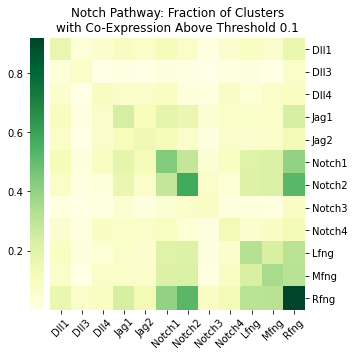

In [18]:
fig,ax = plt.subplots(figsize = (5.5,5))

#Heatmap
sns.heatmap(coexp_df, cmap = "YlGn", ax = ax, 
            cbar_kws = dict(use_gridspec=False, location="left", pad=0.02))

# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

# Shift y labels to the right
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0);

# Set title
ax.set_title(pathway + " Pathway: Fraction of Clusters\nwith Co-Expression Above Threshold " + str(thresh));

#### ECDF of Expression Across Thresholds

We may also be interested in the number of pathway components expressed across the different clusters/cell types in our atlas. We could visualize this by looking at the percent of clusters expressing _n_ components across baseline thresholds of expression (here, ranging from 0.05 - 0.5).

In [19]:
df_thresh = pd.DataFrame(index = df_pathway.index)

# Expression thresholds
min_exp = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# For each cluster, compute the # of genes that are expressed over a threshold
for i in min_exp:
    df_thresh[str(i)] = (df_pathway.T > i).apply(np.count_nonzero)

df_thresh = df_thresh.melt(var_name = "thresh")

# Compute the ECDF for number of components expressed for each threshold
df_ecdf = pd.DataFrame(columns = ["thresh", "value", "ecdf"])

for i in df_thresh["thresh"].unique():
    
    subset_df = df_thresh[df_thresh["thresh"] == i]
    
    for j in range(min(df_thresh["value"]), max(df_thresh["value"] + 1)):

        ecdf_val = len(subset_df[subset_df["value"] <= j]["value"])/len(subset_df["value"])
        
        new_row = pd.DataFrame([[i, j, ecdf_val]], columns = ["thresh", "value", "ecdf"])
                
        df_ecdf = pd.concat([df_ecdf, new_row])
        
df_ecdf.head()

,thresh,value,ecdf
0,0.05,0,0.000000
0,0.05,1,0.068823
0,0.05,2,0.137645
0,0.05,3,0.261194
0,0.05,4,0.452736


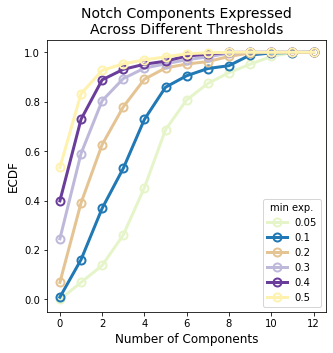

In [20]:
fig, ax = plt.subplots(figsize = (5,5))

colors = ["#e6f5c9", "#2078b4", "#e5c494", "#beb9da", "#6a3d9a", "#fef2ae"]

for idx, i in enumerate(df_ecdf["thresh"].unique()):
    subset = df_ecdf[df_ecdf["thresh"] == i]
    ax.plot(subset["value"], subset["ecdf"], marker = 'o', mfc='none', color = colors[idx], 
            linestyle = "-", markersize = 8, linewidth = 3, markeredgewidth = 2, label = i)
    
ax.legend(title = "min exp.")
ax.set_xlabel("Number of Components", fontsize = 12)
ax.set_ylabel("ECDF", fontsize = 12)
ax.set_title(pathway + " Components Expressed\nAcross Different Thresholds", fontsize = 14);

## Conclusion<a name="concl"></a>

In [21]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn,sklearn,jupyterlab

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.17.0

numpy     : 1.18.5
pandas    : 1.1.0
matplotlib: 3.2.2
seaborn   : 0.11.2
sklearn   : 0.0
jupyterlab: 2.2.4

